<a href="https://colab.research.google.com/github/nikhil-katte/INT247-CA1/blob/main/INT247.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing dataset and libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [3]:
train=pd.read_csv('/content/drive/MyDrive/Titanic disaster/titanic_train.csv')

In [4]:
test=pd.read_csv('/content/drive/MyDrive/Titanic disaster/titanic_test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


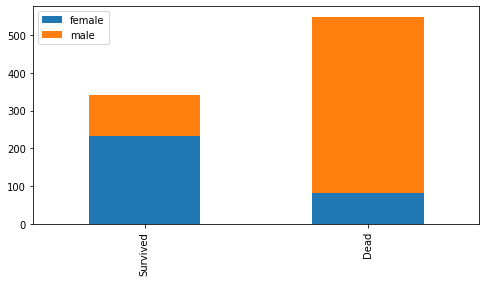

In [7]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [8]:
combined_data = [train,test]

for data in combined_data:
    data["Prefix"] = data["Name"].str.extract(' ([A-Za-z]+)\.', expand = False)

In [9]:
train["Prefix"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64

##Encoding prefix colum as
<ol>
    <li>Mr, Master as 0 
    <li>Miss, Mlle, Ms as 1 
    <li>Mrs, Mme, Lady as 2 
    <li>Others as 3 
</ol>

In [10]:
Prefix_mapping = {"Mr":0,"Miss":1,"Mrs":2,"Master":0,"Dr":3,"Rev":3,"Major":3,"Mlle":1,"Col":3,"Capt":3,"Sir":3,"Ms":1,"Lady":3,"Mme":2,"Countess":3,"Jonkheer":3,"Don":3}

In [11]:
for data in combined_data:
    data["Prefix"] = data["Prefix"].map(Prefix_mapping)

In [12]:
train["Prefix"].value_counts()

0    557
1    185
2    126
3     23
Name: Prefix, dtype: int64

In [13]:
test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Prefix           1
dtype: int64

In [14]:
test["Prefix"] = test["Prefix"].fillna(3)
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Prefix
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188,0.576555
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576,0.822423
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800,0.000000
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200,0.000000
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000,1.000000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200,3.000000


In [15]:
for data in combined_data:
    data.drop(columns = "Name",inplace=True)

In [16]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [17]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


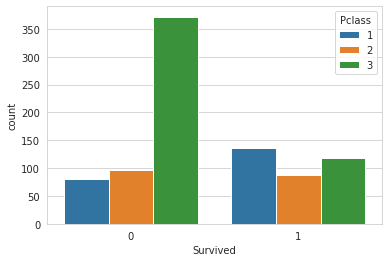

In [18]:
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Pclass", data = train)

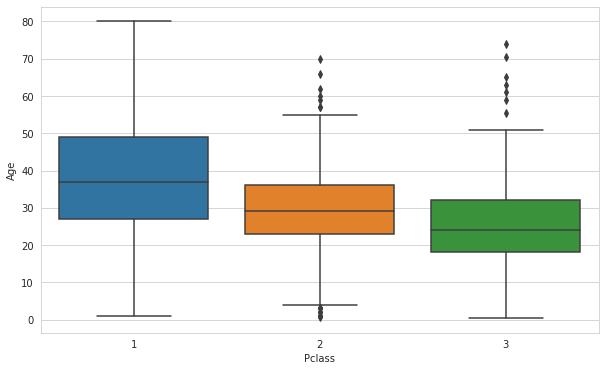

In [19]:
plt.figure(figsize=(10,6))
sns.boxplot(x="Pclass",y="Age",data=train)

In [20]:
train["Age"].isna().sum()

177

In [21]:
avg_first = train["Age"][train["Pclass"]==1].mean()
avg_second = train["Age"][train["Pclass"]==2].mean()
avg_third = train["Age"][train["Pclass"]==3].mean()
print("Average age for First class Passenger : ",avg_first)
print("Average age for Second class Passenger : ",avg_second)
print("Average age for Third class Passenger : ",avg_third)

Average age for First class Passenger :  38.233440860215055
Average age for Second class Passenger :  29.87763005780347
Average age for Third class Passenger :  25.14061971830986


In [22]:
for data in combined_data:
    data["Age"] = data["Age"].fillna(0)
    
for i in range(len(train)):
    if(train.at[i,"Age"]==0):
        if(train.at[i,"Pclass"]==1):
            train.at[i,"Age"]=avg_first
        elif(train.at[i,"Pclass"]==2):
            train.at[i,"Age"]=avg_second
        else:
            train.at[i,"Age"]=avg_third
for i in range(len(test)):
    if(test.at[i,"Age"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Age"]=avg_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Age"]=avg_second
        else:
            test.at[i,"Age"]=avg_third

In [23]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Prefix
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.292875,0.523008,0.381594,32.204208,0.567901
std,257.353842,0.486592,0.836071,13.210527,1.102743,0.806057,49.693429,0.826963
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,1.000000,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,3.000000


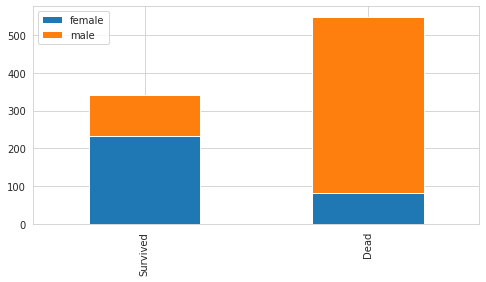

In [24]:
survived = train[train["Survived"]==1]["Sex"].value_counts()
dead = train[train["Survived"]==0]["Sex"].value_counts()
df_sex = pd.DataFrame([survived,dead])
df_sex.index = ["Survived","Dead"]
df_sex.plot(kind="bar",stacked = True, figsize = (8,4))

In [25]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [26]:
train["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [27]:
one_hot = pd.get_dummies(train['Sex'])
one_hot.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [28]:
train["Sex"] = one_hot["female"]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [29]:
one_hot_test = pd.get_dummies(test["Sex"])
test["Sex"] = one_hot_test["female"]
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,892,3,0,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,1,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,0,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,0,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,1,22.0,1,1,3101298,12.2875,NaN,S,2.0


In [30]:
df=train


In [31]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [32]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

train['Embarked'] = labelencoder.fit_transform(train['Embarked'])
test['Embarked']=labelencoder.fit_transform(test['Embarked'])
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,2,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,0,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,2,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,2,0


In [33]:
train.drop(columns = "Ticket", inplace = True)
test.drop(columns = "Ticket", inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Prefix
0,1,0,3,0,22.0,1,0,7.2500,NaN,2,0
1,2,1,1,1,38.0,1,0,71.2833,C85,0,2
2,3,1,3,1,26.0,0,0,7.9250,NaN,2,1
3,4,1,1,1,35.0,1,0,53.1000,C123,2,2
4,5,0,3,0,35.0,0,0,8.0500,NaN,2,0


In [34]:
train["Family"] = train["SibSp"] + train["Parch"] + 1
test["Family"] = test["SibSp"] + test["Parch"] + 1

for data in combined_data:
    data.drop(columns = ["SibSp","Parch"],inplace =True)
    
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Family
0,1,0,3,0,22.0,7.2500,NaN,2,0,2
1,2,1,1,1,38.0,71.2833,C85,0,2,2
2,3,1,3,1,26.0,7.9250,NaN,2,1,1
3,4,1,1,1,35.0,53.1000,C123,2,2,2
4,5,0,3,0,35.0,8.0500,NaN,2,0,1


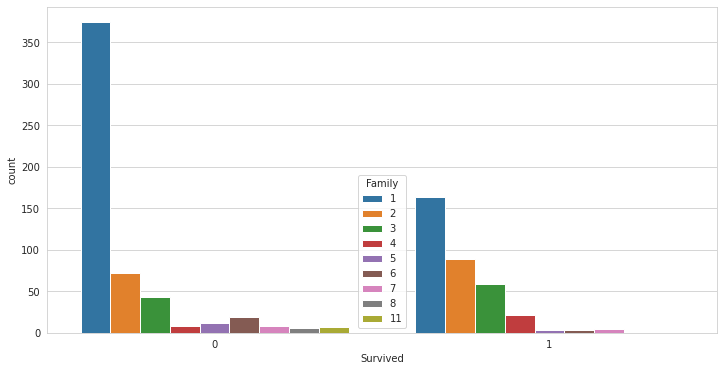

In [35]:
plt.figure(figsize = (12,6))
sns.set_style("whitegrid")
sns.countplot(x = "Survived", hue = "Family", data = train)

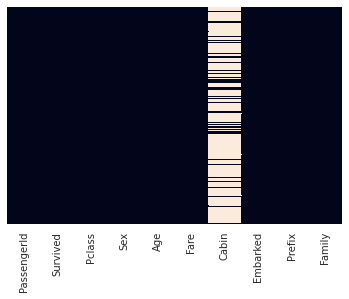

In [36]:
import seaborn as sns

sns.heatmap(train.isnull(), yticklabels = False, cbar = False)

In [37]:
train["Cabin"] = train["Cabin"].fillna(0)
for i in range(len(train)):
    if(train.at[i,"Cabin"]!=0):
        train.at[i,"Cabin"]=1
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Family
0,1,0,3,0,22.0,7.2500,0,2,0,2
1,2,1,1,1,38.0,71.2833,1,0,2,2
2,3,1,3,1,26.0,7.9250,0,2,1,1
3,4,1,1,1,35.0,53.1000,1,2,2,2
4,5,0,3,0,35.0,8.0500,0,2,0,1


In [38]:
test.dropna()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix,Family
12,904,1,1,23.0,82.2667,B45,2,2.0,2
14,906,1,1,47.0,61.1750,E31,2,2.0,2
24,916,1,1,48.0,262.3750,B57 B59 B63 B66,0,2.0,5
26,918,1,1,22.0,61.9792,B36,0,1.0,2
28,920,1,0,41.0,30.5000,A21,2,0.0,1
...,...,...,...,...,...,...,...,...,...
404,1296,1,0,43.0,27.7208,D40,0,0.0,2
405,1297,2,0,20.0,13.8625,D38,0,0.0,1
407,1299,1,0,50.0,211.5000,C80,0,0.0,3
411,1303,1,1,37.0,90.0000,C78,1,2.0,2


In [39]:
test["Fare"].isnull().value_counts()

False    417
True       1
Name: Fare, dtype: int64

In [40]:
fare_first = train["Fare"][train["Pclass"]==1].mean()
fare_second = train["Fare"][train["Pclass"]==2].mean()
fare_third = train["Fare"][train["Pclass"]==3].mean()
print("Average Fare for First class Passenger : ",fare_first)
print("Average Fare for Second class Passenger : ",fare_second)
print("Average Fare for Third class Passenger : ",fare_third)

Average Fare for First class Passenger :  84.15468749999992
Average Fare for Second class Passenger :  20.66218315217391
Average Fare for Third class Passenger :  13.675550101832997


In [41]:
test["Fare"] = test["Fare"].fillna(0)

for i in range(418):
    if(test.at[i,"Fare"]==0):
        if(test.at[i,"Pclass"]==1):
            test.at[i,"Fare"]=fare_first
        elif(test.at[i,"Pclass"]==2):
            test.at[i,"Fare"]=fare_second
        else:
            test.at[i,"Fare"]=fare_third
            
test["Fare"].isnull().value_counts()

False    418
Name: Fare, dtype: int64

In [42]:
test["Cabin"] = test["Cabin"].fillna(0)
for i in range(len(test)):
    if(test.at[i,"Cabin"]!=0):
        test.at[i,"Cabin"]=1

In [43]:
X = train[["Pclass","Sex","Age","Fare","Cabin","Prefix","Embarked","Family"]]
Y = train["Survived"]
X_TEST = test[["Pclass","Sex","Age","Fare","Cabin","Prefix","Embarked","Family"]]

In [44]:
print(X)

     Pclass  Sex       Age     Fare Cabin  Prefix  Embarked  Family
0         3    0  22.00000   7.2500     0       0         2       2
1         1    1  38.00000  71.2833     1       2         0       2
2         3    1  26.00000   7.9250     0       1         2       1
3         1    1  35.00000  53.1000     1       2         2       2
4         3    0  35.00000   8.0500     0       0         2       1
..      ...  ...       ...      ...   ...     ...       ...     ...
886       2    0  27.00000  13.0000     0       3         2       1
887       1    1  19.00000  30.0000     1       1         2       1
888       3    1  25.14062  23.4500     0       1         2       4
889       1    0  26.00000  30.0000     1       0         0       1
890       3    0  32.00000   7.7500     0       0         1       1

[891 rows x 8 columns]


In [45]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)
X_TEST =  sc.transform(X_TEST)
X

array([[ 0.82737724, -0.73769513, -0.55236029, ..., -0.68711703,
         0.58111394,  0.05915988],
       [-1.56610693,  1.35557354,  0.65947522, ...,  1.73272991,
        -1.93846038,  0.05915988],
       [ 0.82737724,  1.35557354, -0.24940141, ...,  0.52280644,
         0.58111394, -0.56097483],
       ...,
       [ 0.82737724,  1.35557354, -0.31449064, ...,  0.52280644,
         0.58111394,  1.29942929],
       [-1.56610693, -0.73769513, -0.24940141, ..., -0.68711703,
        -1.93846038, -0.56097483],
       [ 0.82737724, -0.73769513,  0.20503691, ..., -0.68711703,
        -0.67867322, -0.56097483]])

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state=1)

##KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

acc = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    yhat = knn.predict(X_test)
    acc.append(accuracy_score(y_test,yhat))
    print("For k = ",i," : ",accuracy_score(y_test,yhat))


For k =  1  :  0.7206703910614525
For k =  2  :  0.7486033519553073
For k =  3  :  0.7821229050279329
For k =  4  :  0.7597765363128491
For k =  5  :  0.7430167597765364
For k =  6  :  0.7374301675977654
For k =  7  :  0.7597765363128491
For k =  8  :  0.776536312849162
For k =  9  :  0.7877094972067039
For k =  10  :  0.770949720670391
For k =  11  :  0.7877094972067039
For k =  12  :  0.7932960893854749
For k =  13  :  0.7932960893854749
For k =  14  :  0.7932960893854749
For k =  15  :  0.7877094972067039
For k =  16  :  0.770949720670391
For k =  17  :  0.7932960893854749
For k =  18  :  0.7877094972067039
For k =  19  :  0.7877094972067039


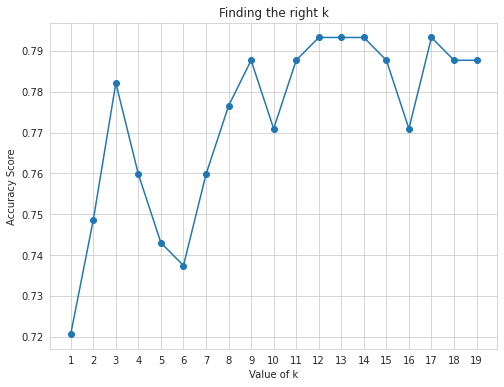

In [48]:
plt.figure(figsize=(8,6))
plt.plot(range(1,20),acc, marker = "o")
plt.xlabel("Value of k")
plt.ylabel("Accuracy Score")
plt.title("Finding the right k")
plt.xticks(range(1,20))
plt.show()

In [49]:
KNN = KNeighborsClassifier(n_neighbors = 13)
KNN.fit(X,Y)
y_pred = KNN.predict(X_TEST)

In [50]:
df_KNN = pd.DataFrame()
df_KNN["PassengerId"] = test["PassengerId"]
df_KNN["Survived"] = y_pred
df_KNN.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [69]:
df_KNN.to_csv('df_KNN.csv',index=False)

In [83]:
KNN_accuracy = 0.77272

##Decision Tree

In [70]:
from sklearn.tree import DecisionTreeClassifier

depth = [];

for i in range(1,8):
    clf_tree = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = i)
    clf_tree.fit(X_train,y_train)
    yhat = clf_tree.predict(X_test)
    depth.append(accuracy_score(y_test,yhat))
    print("For max depth = ",i, " : ",accuracy_score(y_test,yhat))

For max depth =  1  :  0.776536312849162
For max depth =  2  :  0.7206703910614525
For max depth =  3  :  0.8044692737430168
For max depth =  4  :  0.7877094972067039
For max depth =  5  :  0.7653631284916201
For max depth =  6  :  0.7541899441340782
For max depth =  7  :  0.7094972067039106


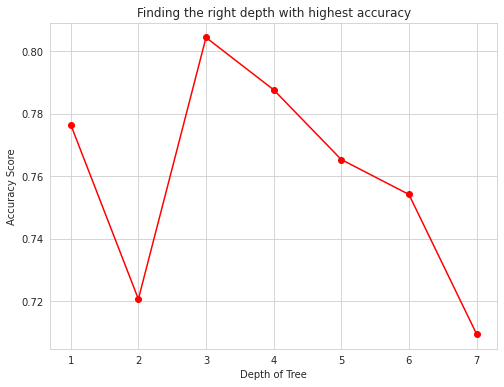

In [71]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),depth,color="red", marker = "o")
plt.xlabel("Depth of Tree")
plt.ylabel("Accuracy Score")
plt.title("Finding the right depth with highest accuracy")
plt.xticks(range(1,8))
plt.show()

In [72]:
clf_tr = DecisionTreeClassifier(criterion="entropy", random_state = 100, max_depth = 3)
clf_tr.fit(X,Y)
pred_tree = clf_tr.predict(X_TEST)
print(pred_tree)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [74]:
df_TREE = pd.DataFrame()
df_TREE["PassengerId"] = test["PassengerId"]
df_TREE["Survived"] = pred_tree
df_TREE.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [75]:
df_TREE.to_csv("df_Tree.csv",index=False)

In [76]:
TREE_accuracy = 0.78468

## 3. Random Forest Algorithm
We try out the Random Forest algorithm for this classification problem.

In [77]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(random_state=0)
clf_forest.fit(X_train,y_train)
yhat = clf_forest.predict(X_test)
print("Accuracy for training data : ",accuracy_score(y_test,yhat))

Accuracy for training data :  0.7541899441340782


In [78]:
clf_for = RandomForestClassifier(random_state=0)
clf_for.fit(X,Y)
y_forest = clf_for.predict(X_TEST)
y_forest

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [79]:
df_FOREST = pd.DataFrame()
df_FOREST["PassengerId"] = test["PassengerId"]
df_FOREST["Survived"] = y_forest
df_FOREST.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,1


In [80]:
df_FOREST.to_csv("df_FOREST.csv",index=False)

In [81]:
FOREST_accuracy = 0.77272

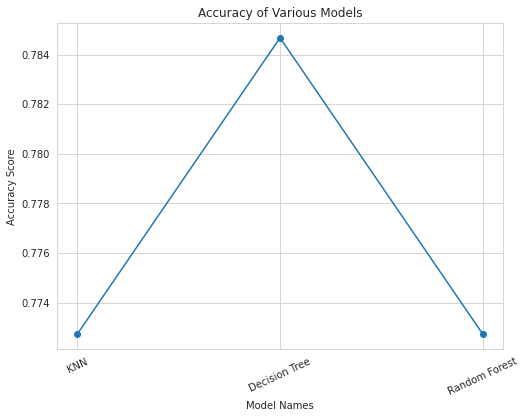

In [86]:
plt.figure(figsize=(8,6))
plt.plot(range(1,4),[KNN_accuracy,TREE_accuracy,FOREST_accuracy,],marker='o')
plt.xticks(range(1,4),['KNN','Decision Tree','Random Forest',],rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()

##Ensembling with VotingClassifier


In [87]:
from sklearn.ensemble import VotingClassifier

In [88]:
model=VotingClassifier([('knn',knn),('tree',clf_tree),('forest',clf_forest)])

In [89]:
model.fit(X_train,y_train)

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=19)),
                             ('tree',
                              DecisionTreeClassifier(criterion='entropy',
                                                     max_depth=7,
                                                     random_state=100)),
                             ('forest',
                              RandomForestClassifier(random_state=0))])

In [91]:
model.score(X_test,y_test)

0.7653631284916201